
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project-2 | Part-2 : Titanic: Machine Learning from Disaster


**Wijdan, Yazeed and Amal.**

---

**Overview**
In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or died.



The data has already been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary

VariableDefinitionKey survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Introduction**

In this blog, we will discuss the workflow of a Machine learning project this includes all the steps required to build the proper machine learning project from scratch.
We will also go over data pre-processing, data cleaning, feature exploration and feature engineering and show the impact that it has on Machine Learning Model Performance. We will also cover a couple of the pre-modelling steps that can help to improve the model performance.


Tthe machine learning workflow:
    

- Data pre-processing\cleaning.
- Researching the model that will be best for the type of data.
- Training and testing the model.
- Evaluation.


In [1]:
# Python Libraries that would be need to achieve the task:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import random as rnd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

#importing all the required ML packages
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix




'''Customize visualization.'''
plt.style.use('bmh')                    # Use bmh's style for plotting
sns.set_style({'axes.grid':False})      # Remove gridlines

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
# Load train.csv and test.csv from Kaggle into DataFrames:

# loading Train dataset 
titanic_train = pd.read_csv('train.csv')
# loading Test dataset
titanic_test = pd.read_csv('test.csv')

# Creating copies of the two dataframes:
data = titanic_train.copy()
test  = titanic_test.copy()




In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.Survived.shape

(891,)

# 2. Preparing Train and Test Data:
- Merge train and test data together.
- Treating missing values
- Outliers
- data types
- Feature Engneering

In [5]:
'''Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.'''
merged = pd.concat([data, test], sort = False)
bold('**Preview of Merged Data:**')
display(merged.head(5))

**Preview of Merged Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
merged[890:899]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,NaN,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,NaN,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S


____

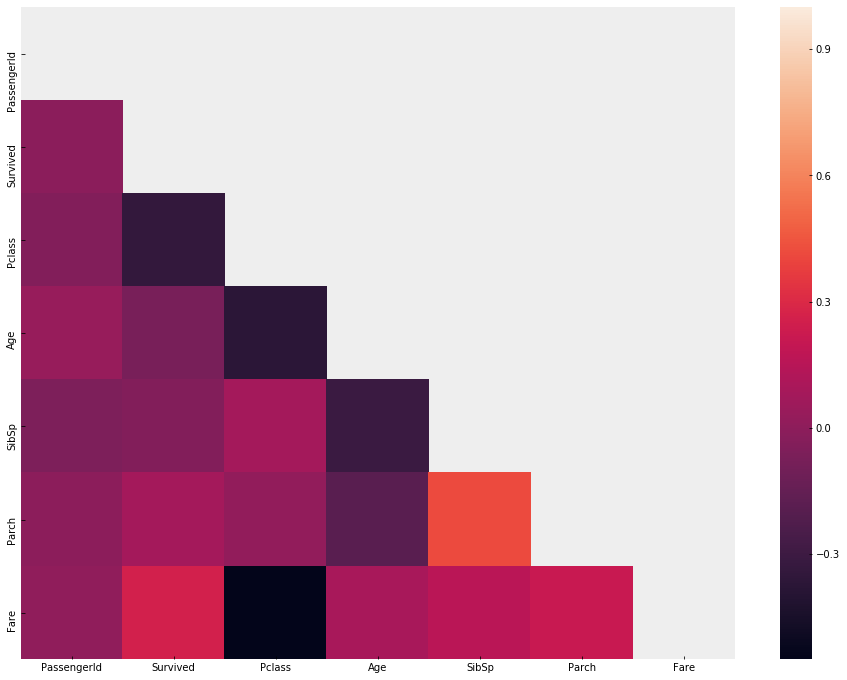

In [7]:
# Heatmaps, yellow are the missing data.
corr = data.corr()

fig, ax = plt.subplots(figsize=(16,12))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax)#, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10)

plt.show()

_____

In [8]:
''' #1.Function for displaying bar labels in absolute scale.'''
def abs_bar_labels():
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    # Set individual bar lebels in absolute number
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
    
'''#2.Function for displaying bar lebels in relative scale.'''
def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    # Set individual bar lebels in proportional scale
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = font_size, color = 'black')
         
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # Was multiplied by 100 and rounded to 2 decimal points for percentage.
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Absolute & Relative Frequency of',variable.name,':')
    display(df)
    
    # This portion plots absolute frequency with bar labeled.
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()  # Displays bar labels in abs scale.
    plt.show()
    
    # This portion plots relative frequency with bar labeled.
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels() # Displays bar labels in relative scale.
    plt.show()

______

One of the best ways to inspect data is to visualize it. One way to do this is by using a scatter plot. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. 

Absolute & Relative Frequency of Survived :


,Absolute Frequency,Relative Frequency(%)
0.0,549,61.62
1.0,342,38.38


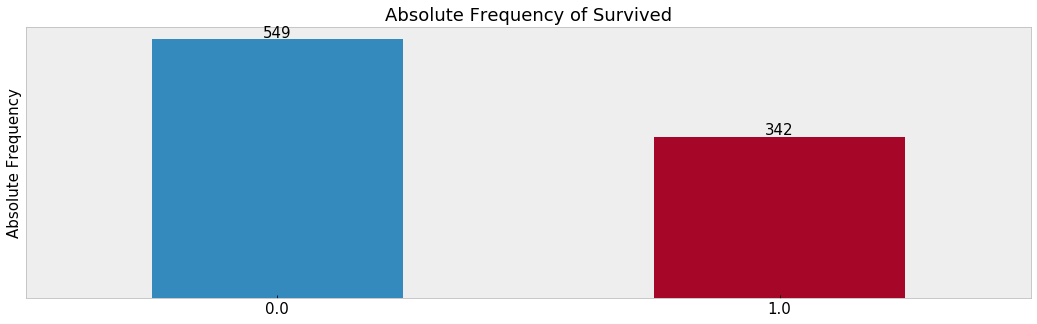

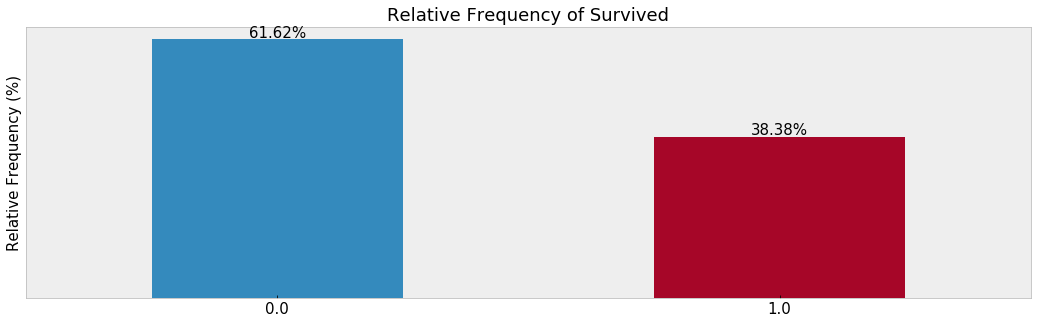

In [9]:
'''Plot and count the number of survivors and victims in absolute and relative scale in the tragedy.'''
absolute_and_relative_freq(merged.Survived)

Findings: Variable Survived is imbalanced since the proportion of survivors and victims is not equally represented in its distribution. Out of 891 passengers, only 342 passengers survived and a whopping 549 passengers died. Or put another way, 61.62% passengers died while just 38.38% of passengers were lucky enough to survive.

_______
______

**Sex**

In [10]:
merged['Sex'] = merged['Sex'].astype('category')

Absolute & Relative Frequency of Sex :


,Absolute Frequency,Relative Frequency(%)
male,843,64.4
female,466,35.6


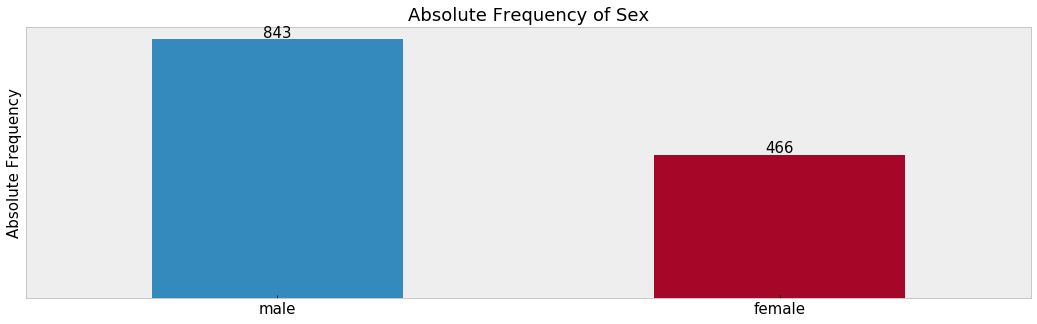

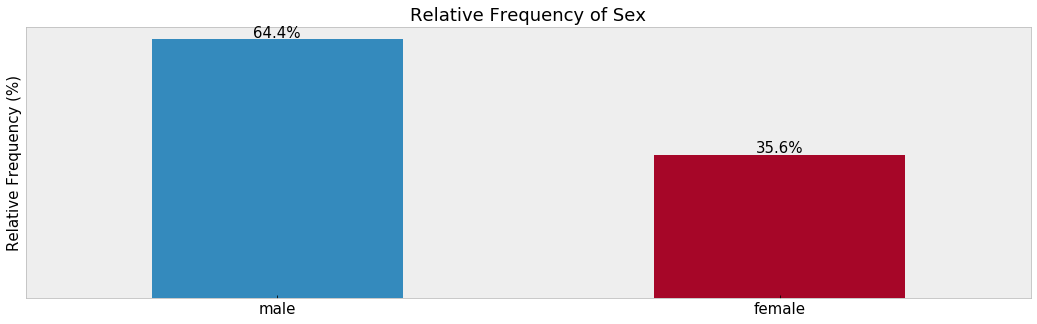

In [11]:
absolute_and_relative_freq(merged.Sex)

Findings: Variable Sex is imbalanced as proportion of male vs female in its distribution are not equally represented. Rather Male(843) has outnumbered female (466) in variable Sex. Or, proportionally, over 64% of Sex variable consists of label male while female contibutes to only over 35.5% of Sex.

**Pclass**

Absolute & Relative Frequency of Pclass :


,Absolute Frequency,Relative Frequency(%)
3,709,54.16
1,323,24.68
2,277,21.16


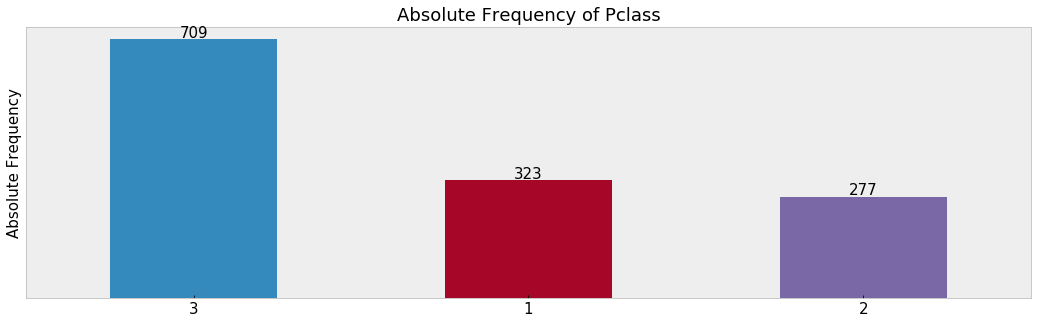

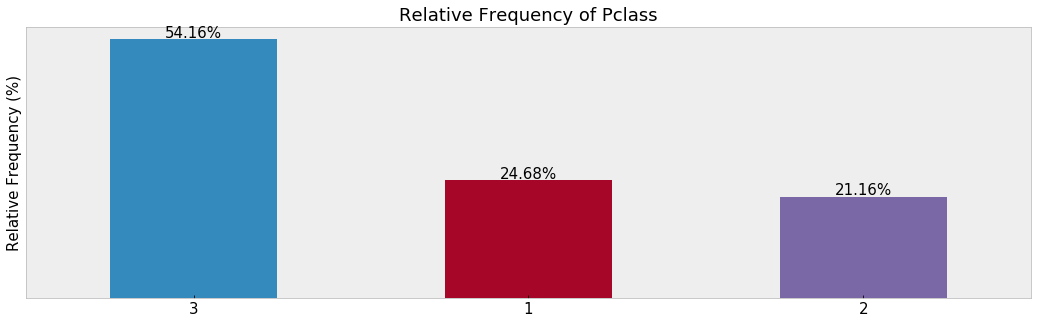

In [12]:
'''Plot and count the absolute and relative frequency of Pclass.'''
absolute_and_relative_freq(merged.Pclass)

Findings: Again class distribution of Pclass is imbalanced as three categories of Pclass are not evenly represented in its distribution. 3 (Pclass3) is the most occured (709) levels of Pclass while 2 is the least occured (277). Another way of saying that, over 54% of Pclass variable consists of 3(Pclass3) while 1 and 2 both combinedly contribute to nearly 46% of Pclass.

**Embarked**

Absolute & Relative Frequency of Embarked :


,Absolute Frequency,Relative Frequency(%)
S,914,69.93
C,270,20.66
Q,123,9.41


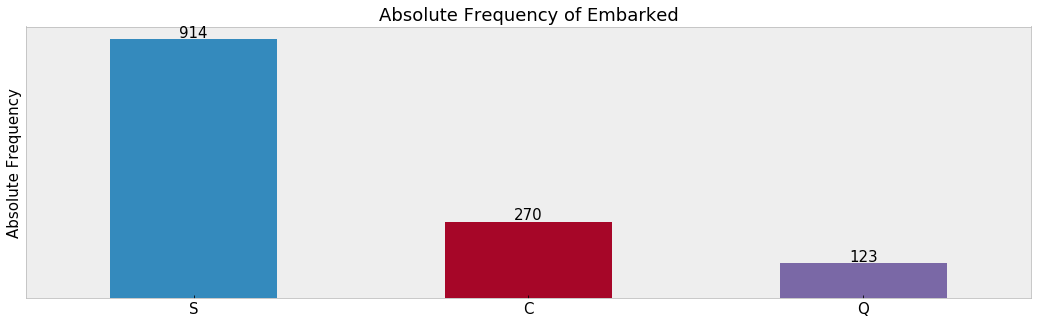

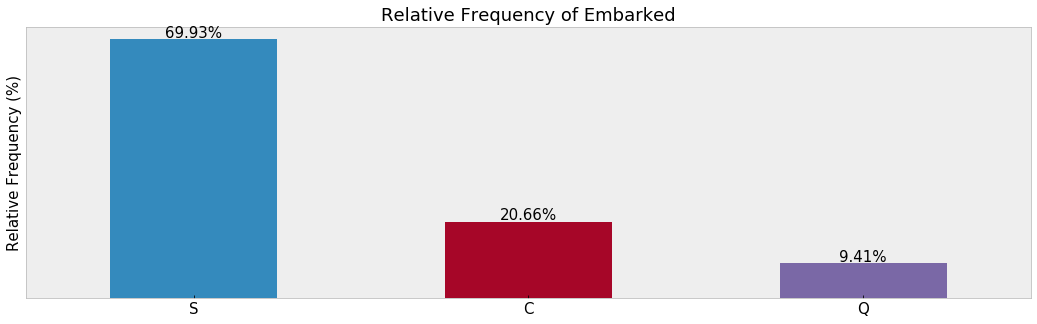

In [13]:
'''Plot and count the absolute and relative frequency of Embarked.'''
absolute_and_relative_freq(merged.Embarked)

Findings: Embarked is also imbalanced since its levels are not equally represented in its distribution. A whopping 914 passengers embarked from Southamton while just 123 embarked from Queenstown. In other words, almost 70% of Embarked consists of S while both C and Q contribute to 30 to Embarked.

**Cabin**

In [14]:
'''Absolute frequency of Cabin.'''
abs_freq_cabin = merged.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin.head())

**Categories of Cabin:**

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
D                     4
Name: Cabin, dtype: int64

In [15]:
"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold('**Total Categories in Cabin:**')
display(abs_freq_cabin.count())

**Total Categories in Cabin:**

187

In [16]:
'''Finally preview the variable Cabin to see what is causing the irregularity.'''
bold('**Preview of Cabin:**')
display(merged.Cabin.head(7))

**Preview of Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
Name: Cabin, dtype: object

Findings: Looks like Cabin is alphanumeric type variable with 1014 missing obsevations. There are 187 kinds of categories in variable Cabin. Since there are too many categories in Cabin, we must process (i.e., reduce the number of categories) Cabin to check if there is any association between Survived and Cabin.

In [17]:
#  Embarked feature takes S, Q, C values based on port of embarkation. Our training and test datasets have missing values.
# "Null" values in the 'Cabin' featues probably means that the passenger was not in a cabin, therfor, Null = 0 Cabin

# Train-Cabin
merged['Cabin'] = merged['Cabin'].fillna(0)
merged['Cabin'] = merged['Cabin'].apply(lambda x: 1 if x != 0 else x)
merged['Cabin'].isnull().sum()



0

 The response variable; Survived

Of course, the very first thing that I want to do is explore the response variable. How many people survived, and how many died? You can see this below. Altogether, of the people in the training set (891 observations) 61.6% died. For the remaining 418 observations (test set), this is what we have to predict.

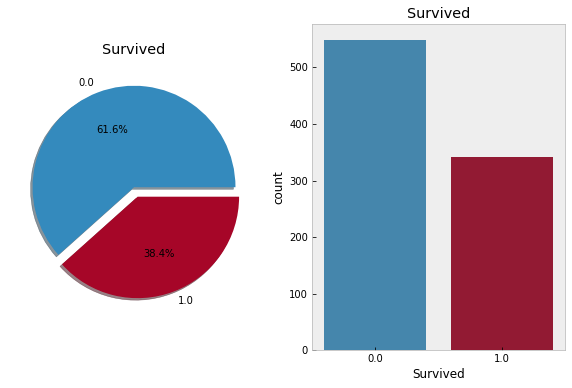

In [18]:
# female vs. males survivals
f,ax=plt.subplots(1,2,figsize=(10,6))

merged['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=merged,ax=ax[1])
ax[1].set_title('Survived')
plt.show();

Sex/gender

Of the 1309 people on the Titanic, a majority of 64.4% was male. This percentage was almost the same in the training data (64.7%). Within the training data 81.1% of the men died, and 25.8% of the women died. Due to this large difference, Sex/gender seems a very important predictor.

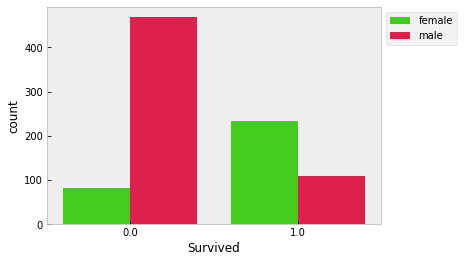

In [19]:
sns.countplot(x='Survived',data=merged, hue='Sex',palette='prism')

# To relocate the legend
plt.legend(bbox_to_anchor=(1,1), loc=2);

____________________

Passenger Class

As you can see below, most people traveled in 3rd class. Also, as expected, survival is strongly correlated with the passenger class. A majority of first class passengers survived, and most people in 3rd class died. It is also noticable that almost all women in 1st and 2nd class survived. For men, 2nd class was almost as bad as 3rd class.

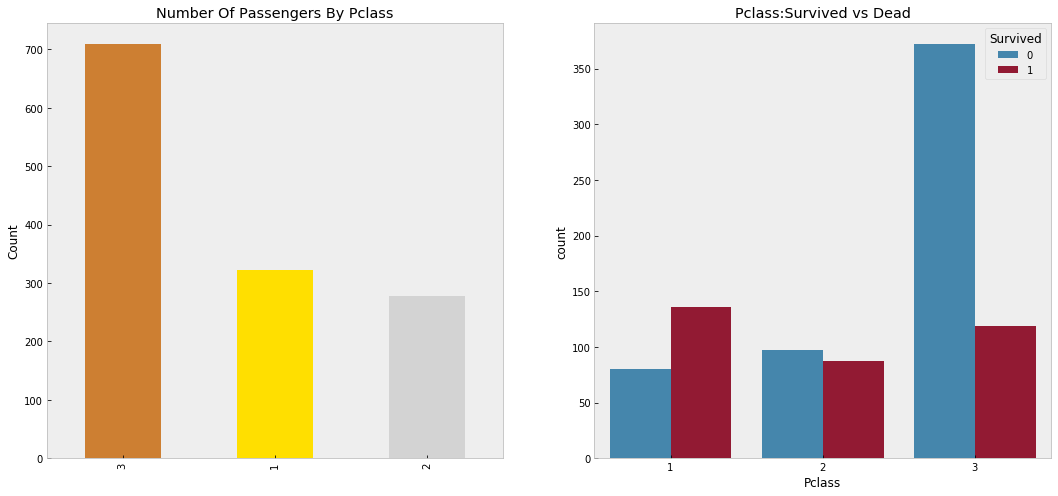

In [20]:
# Pclass
f,ax=plt.subplots(1,2,figsize=(18,8))
merged['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [21]:
def pclasssex(col):
    if col[0] == 1:
        if col[1] == 'male':
            return 'P1Male'
        elif col[1] == 'female':
            return 'P1Female'
    elif col[0] == 2:
        if col[1] == 'male':
            return 'P2Male'
        elif col[1] == 'female':
            return 'P2Female'
    elif col[0] == 3:
        if col[1] == 'male':
            return 'P3Male'
        elif col[1] == 'female':
            return 'P3Female'


In [22]:
merged['PclassSex'] = merged[['Pclass','Sex']].apply(pclasssex,axis=1)

_____

We’re going to look at our current variables and see if we can obtain anything meaningful from them. This includes creating additional variables, or simply understanding distributions so we can understand which variables might be valuable for us.
 
With a name, we can see a person’s status (Mr., Mrs., etc.) and their family (Surname). We can split up the variable into one extra field, containing the title.
 
We’ll use a Summarize Tool to add up all the unique titles, and then Crosstab it by gender into a more readable table. Since the Crosstab brings in nulls for any values that are zero, we’ll throw in an Imputation Tool to correct for this. The output table is a bit cumbersome with so many unique titles, so we’ll just use a Formula Tool to combine all these Titles and then use a Select Tool to only choose the aggregated titles.

**Process Name**


What we can easily understand from this column, it contains strings that further contains titles such as Mr, Mrs, Master etc. These titles give us some useful information about sex(Mr = male, Mrs = married female), age(Miss is usually younger than Mrs), and profession(Master indicates profession and hence social status) etc which in the end could tell us something more about survival. Now we want to extract these titles from Name to check if there is any association between these titles and Survived.

In [23]:
'''Create a new variable Title that extracts titles from Name.'''
merged['Title'] = merged.Name.str.extract('([A-Za-z]+)\.')
'''See how it works.'''
display(merged.Title.head())

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [24]:
'''Count the extracted categories of Title from Name.'''
display(merged.Title.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Countess      1
Don           1
Mme           1
Sir           1
Jonkheer      1
Dona          1
Lady          1
Capt          1
Name: Title, dtype: int64

We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets. Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket. Titles such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats and hence these titles will be put into bucket 'Aristocrat'. We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.

In [25]:
pd.crosstab(merged['Title'], merged['Sex']).T

Title,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [26]:
'''Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.'''

merged.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

'''Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.'''
merged.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [27]:
"""let's see how Title looks now"""
display(merged.Title.value_counts())

Mr            757
Miss          264
Mrs           198
Master         61
Officer        23
Aristocrat      6
Name: Title, dtype: int64

In [28]:
'''#3.Function to create a dataframe of absolute and relative frequency of each variable. And plot absolute and relative frequency.'''
def absolute_and_relative_freq(variable):
    global  ax, ax1 
    # Dataframe of absolute and relative frequency
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    # Was multiplied by 100 and rounded to 2 decimal points for percentage.
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Absolute & Relative Frequency of',variable.name,':')
    display(df)

In [29]:
'''Plot and count the absolute and relative frequency of SibSp.'''
absolute_and_relative_freq(merged.SibSp)


'''After processing, visualise and count absolute and relative frequency of transformed Title.'''
absolute_and_relative_freq(merged.Title)

Absolute & Relative Frequency of SibSp :


,Absolute Frequency,Relative Frequency(%)
0,891,68.07
1,319,24.37
2,42,3.21
4,22,1.68
3,20,1.53
8,9,0.69
5,6,0.46


Absolute & Relative Frequency of Title :


,Absolute Frequency,Relative Frequency(%)
Mr,757,57.83
Miss,264,20.17
Mrs,198,15.13
Master,61,4.66
Officer,23,1.76
Aristocrat,6,0.46


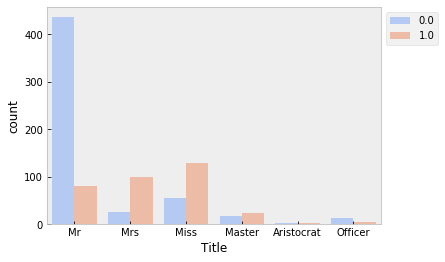

In [30]:
sns.countplot(x='Title',data=merged, hue='Survived',palette='coolwarm')

# To relocate the legend
plt.legend(bbox_to_anchor=(1,1), loc=2);

**Process SibSp & Parch**

Findings: Nearly 58% passengers had title Mr(male of course), followed by over 20% passengers had titles Miss(unmarried women hence usually younger than Mrs). Just over 15% passengers were married women (Mrs).

5.3 Process SibSp & Parch 
In univariate analysis, we saw some passengers had siblings/spouses and some didn't have. The same is also true for variable Parch. Since these two variables together indicate the size of a family, we would create a new variable 'Family_size' from these two variables.

In [31]:
'''Merge SibSp and Parch to create a variable Family_size.'''

merged['Family_size'] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
bold('**Categoiries in Family_size:**')
display(merged.Family_size.value_counts())

**Categoiries in Family_size:**

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64

We see there are several family sizes with the very least frequency. So its sensible to put them in a fewer buckets. We will create 4 buckets namely single, small, medium, and large for rest of them.

In [32]:
'''Create buckets of single, small, medium, and large and then put respective values into them.'''
merged.Family_size.replace(to_replace = [1], value = 'single', inplace = True)
merged.Family_size.replace(to_replace = [2,3], value = 'small', inplace = True)
merged.Family_size.replace(to_replace = [4,5], value = 'medium', inplace = True)
merged.Family_size.replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

In [33]:
'''After processing, visualise and count the absolute and relative frequency of engineered Family_size.'''
absolute_and_relative_freq(merged.Family_size)

Absolute & Relative Frequency of Family_size :


,Absolute Frequency,Relative Frequency(%)
single,790,60.35
small,394,30.10
medium,65,4.97
large,60,4.58


Findings: Looks like most of the passengers (over 60%) were single(without family), followed by 30% passengers had a small family. Almost 5% passengers had medium families and just over 4.5% passengers had large families abroad.

In [34]:
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PclassSex,Title,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,P3Male,Mr,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,P1Female,Mrs,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,P3Female,Miss,single
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,P1Female,Mrs,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,P3Male,Mr,single


_____
____
______

In [35]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    global filtered
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    out_variables = [variable, filtered]
    out_titles = [' Distribution with Outliers', ' Distribution Without Outliers']
    title_size = 25
    font_size = 18
    plt.figure(figsize = (25, 15))
    for ax, outlier, title in zip(range(1,3), out_variables, out_titles):
        plt.subplot(2, 1, ax)
        sns.boxplot(outlier).set_title('%s' %outlier.name + title, fontsize = title_size)
        plt.xticks(fontsize = font_size)
        plt.xlabel('%s' %outlier.name, fontsize = font_size)

Total Outliers of Age : 9


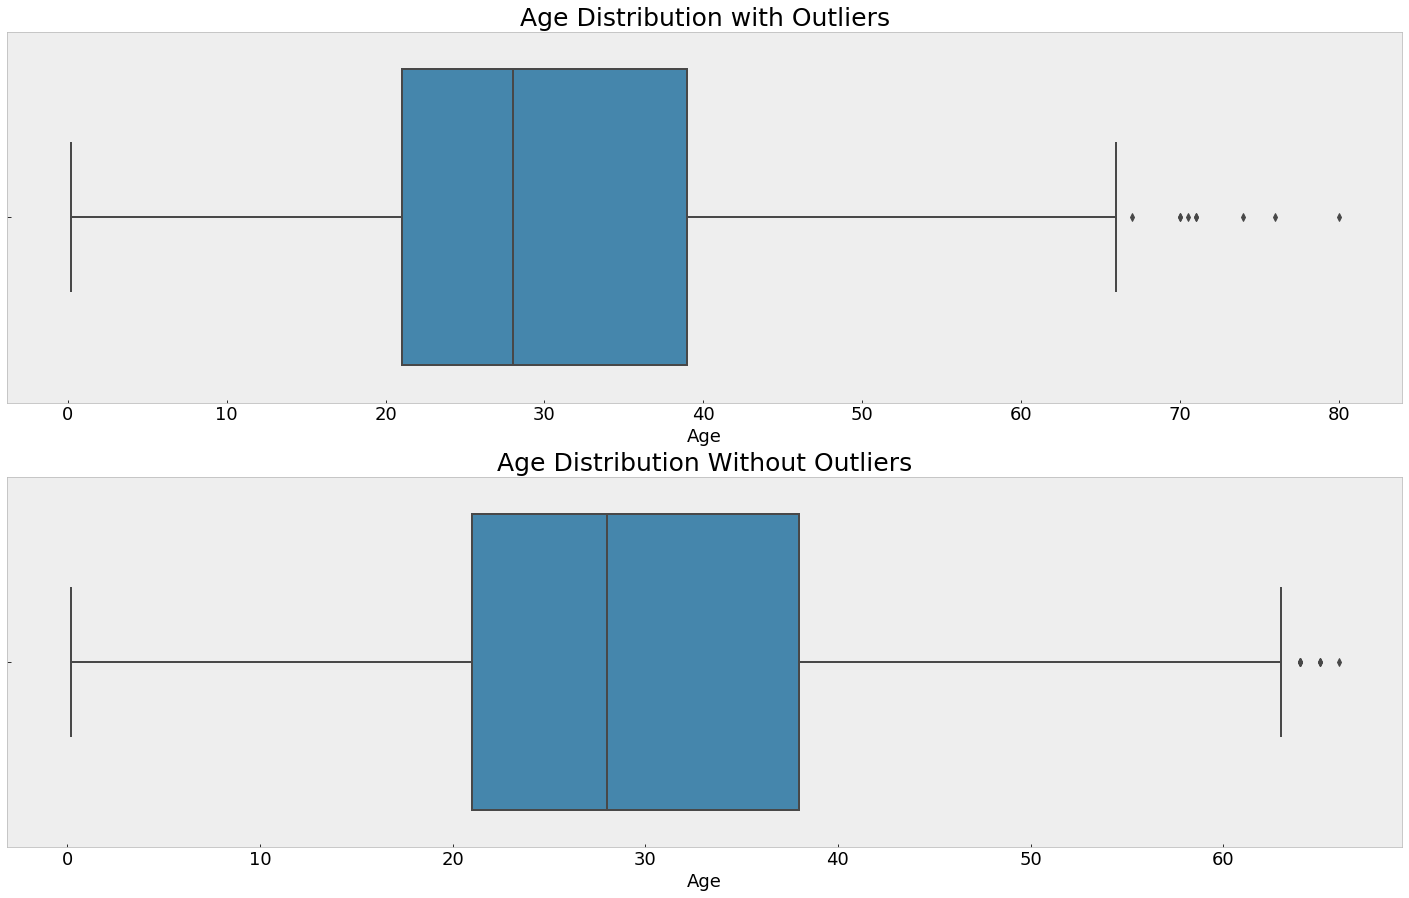

In [36]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
outliers(merged.Age)

We count 9 outliers but boxplot shows 7 because 70 and 71 have duplicates.

For a box plot, if the longer part of the box is right (or above) to the median, the data is said to be skewed right. If the longer part is left (or below) to the median, the data is skewed left. In our case, the bigger part of the box is right to the median

Total Outliers of Fare : 171


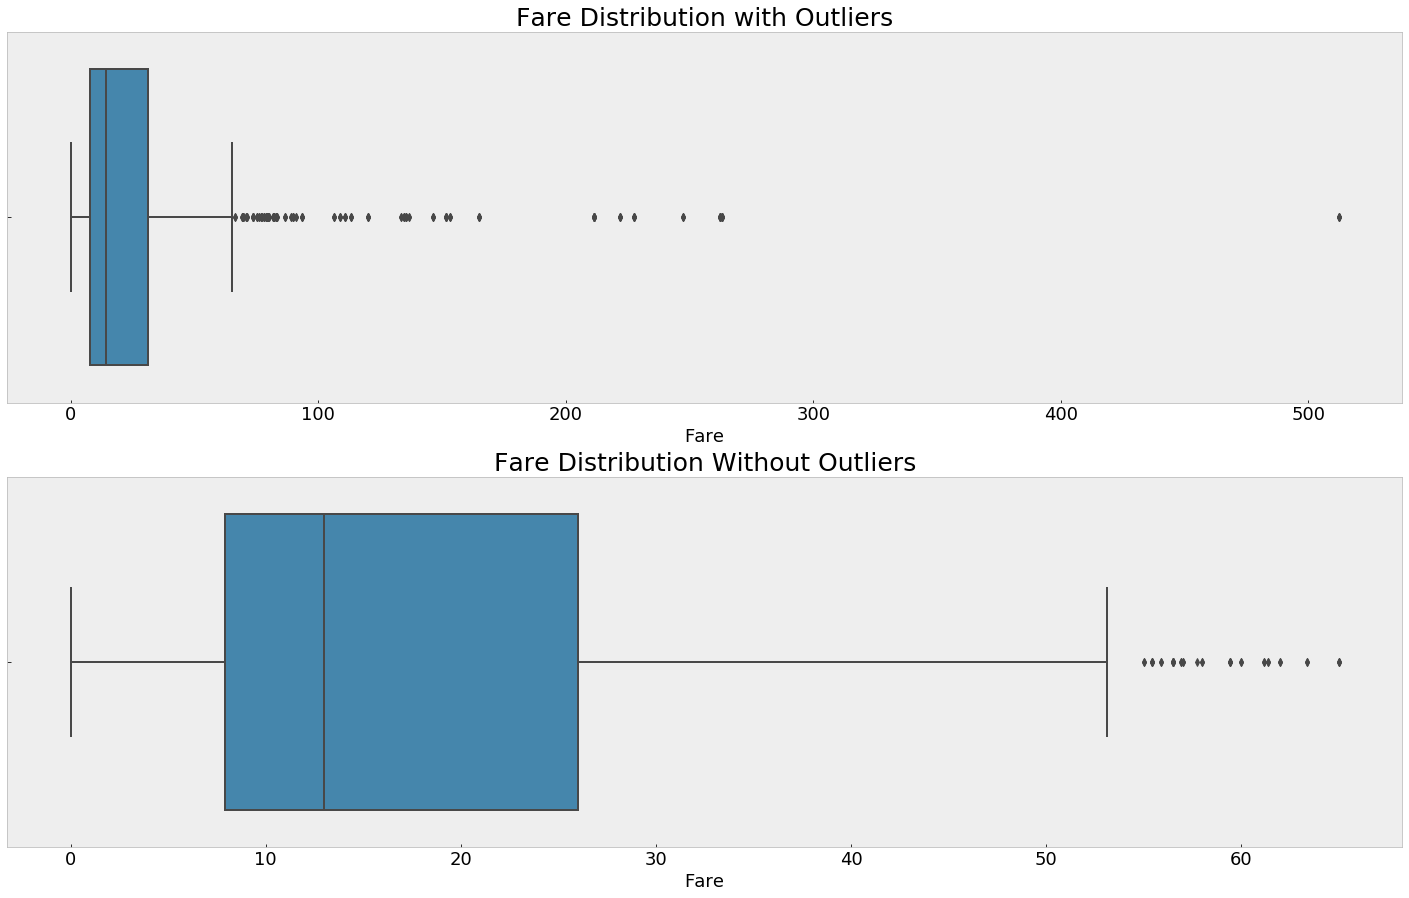

In [37]:
'''Count total outliers of Fare. Plot Fare with and without outliers.'''
outliers(merged.Fare)

In [38]:
# Impute Embarked & Fare 

'''Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent.'''
merged.Embarked.fillna(value = 'S', inplace = True)

'''Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged.Fare.fillna(value = merged.Fare.median(), inplace = True)

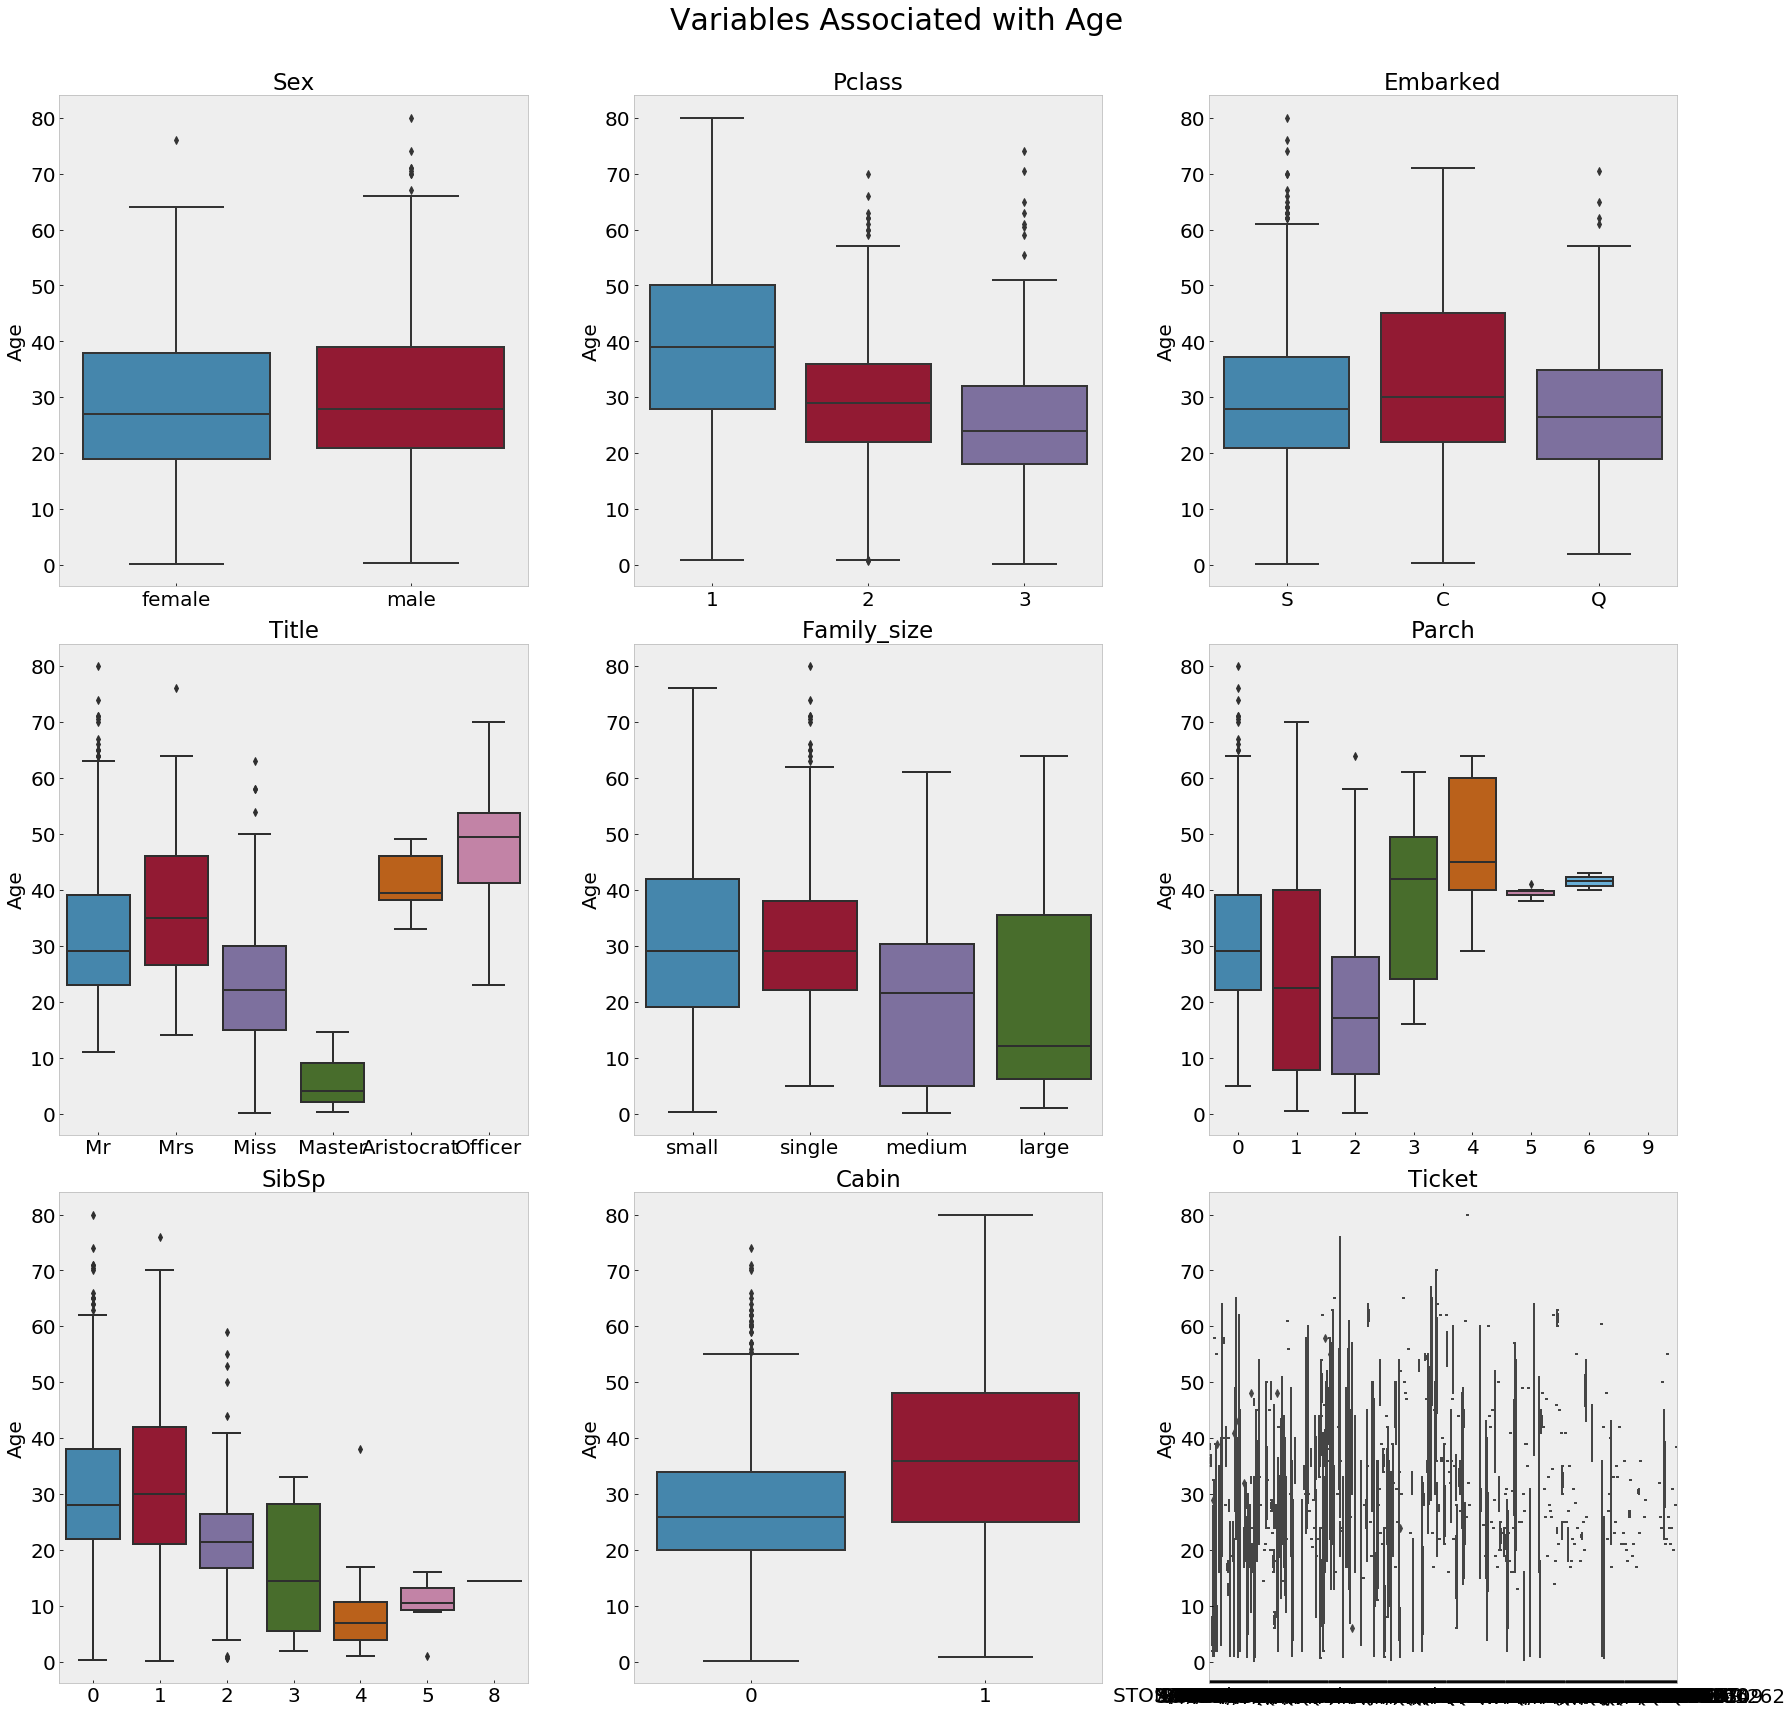

In [39]:
# Impute Age 
# To impute Age with grouped median, we need to know which features are heavily correlated with Age. Let's find out the variables correlated with Age.

"""Create a boxplot to view the variables correlated with Age. First extract the variables we're interested in."""
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
for ax, column in zip(axes.flatten(), correlation.columns):
    sns.boxplot(x = correlation[column], y =  merged.Age, ax = ax)
    ax.set_title(column, fontsize = 23)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    ax.set_ylabel('Age', fontsize = 20)
    ax.set_xlabel('')
fig.suptitle('Variables Associated with Age', fontsize = 30)
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

In [40]:
'''Impute Age with median of respective columns (i.e., Title and Pclass).'''
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
'''So by now we should have variables with no missing values.'''
bold('**Missing Values after Imputation:**')
display(merged.isnull().sum())

In [ ]:
# Binning Age 

'''Create bin categories for Age.'''
label_names = ['infant','child','teenager','young_adult','adult','aged']

'''Create range for each bin categories of Age.'''
cut_points = [0,5,12,18,35,60,81]

'''Create and view categorized Age with original Age.'''
merged['Age_binned'] = pd.cut(merged.Age, cut_points, labels = label_names)
bold('**Age with Categorized Age:**')
display(merged[['Age', 'Age_binned']].head(5))

In [ ]:
# Binning Fare 

'''Create bin categories for Fare.'''
groups = ['low','medium','high','very_high']

'''Create range for each bin categories of Fare.'''
cut_points = [-1, 130, 260, 390, 520]

'''Create and view categorized Fare with original Fare.'''
merged['Fare_binned'] = pd.cut(merged.Fare, cut_points, labels = groups)
bold('**Fare with Categorized Fare:**')
display(merged[['Fare', 'Fare_binned']].head(2))

In [ ]:
# Dropping Features 
# Now we have both transformed and the original variables transformation have been made from. So we should safely drop the variables that we think would not be useful anymore for our survival analysis since they are very unlikely to be analyzed in their raw forms.

"""Let's see all the variables we currently have with their category."""
display(merged.head(7))

'''Drop the features that would not be useful anymore.'''
merged.drop(columns = ['Name', 'Age', 'Fare', 'Ticket'], inplace = True, axis = 1)

'''Features after dropping.'''
bold('**Features Remaining after Dropping:**')
display(merged.columns)

In [80]:
'''Checking current data types.'''
bold('**Current Variable Data Types:**')
display(merged.dtypes)

**Current Variable Data Types:**

PassengerId       int64
Survived          int64
Pclass         category
Sex            category
SibSp             int64
Parch             int64
Cabin          category
Embarked       category
PclassSex        object
Title          category
Family_size      object
Age_binned     category
Fare_binned    category
dtype: object

In [81]:
'''Correcting data types, converting into categorical variables.'''
merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size']] = merged.loc[:, ['Pclass', 'Sex', 'Embarked', 'Cabin', 'Title', 'Family_size']].astype('category')

'''Due to merging there are NaN values in Survived for test set observations.'''
merged.Survived = merged.Survived.dropna().astype('int')#Converting without dropping NaN throws an error.

In [82]:
'''Check if data types have been corrected.'''
bold('**Data Types after Correction:**')
display(merged.dtypes)

**Data Types after Correction:**

PassengerId       int64
Survived          int64
Pclass         category
Sex            category
SibSp             int64
Parch             int64
Cabin          category
Embarked       category
PclassSex        object
Title          category
Family_size    category
Age_binned     category
Fare_binned    category
dtype: object

In [83]:
list(merged.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Cabin',
 'Embarked',
 'PclassSex',
 'Title',
 'Family_size',
 'Age_binned',
 'Fare_binned']

In [120]:
# Encoding Categorical Variables 
# WE would like to use one hot encoding instead of label encoding because algorithm might give weights to higher values if label encoding is used to encode numeric variables.


'''Convert categorical data into numeric to feed our machine learning model.'''
merged = pd.get_dummies(merged)

"""Let's visualize the updated dataset that would be fed to our machine learning algorithms."""
bold('**Preview of Processed Data:**')
display(merged.head(2))

**Preview of Processed Data:**

,index,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Age_binned_infant,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_low,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
0,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
1,1,2,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


____

# Training and testing the model on data

For training a model we initially split the model into 3 three sections which are ‘Training data’ ,‘Validation data’ and ‘Testing data’.


In a data set, a training set is implemented to build up a model, while a test (or validation) set is to validate the model built. Data points in the training set are excluded from the test (validation) set. Usually, a data set is divided into a training set, a validation set in each iteration, or divided into a training set, a validation set and a test set in each iteration.


Model Building and Evaluation 
With all the preprocessings done and dusted, we're ready to train classifiers with the processed data. First extract train and test data from variable merged. Then feed the training data to the classifiers we're interested in for this problem.

In [121]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [122]:
merged.reset_index(inplace=True)

In [134]:
'''Set a seed for reproducibility'''
seed = 43

"""Let's split the train and test set to feed machine learning algorithm."""

df_train = merged.iloc[:891, :]
df_test  = merged.iloc[891:, :]

In [124]:
'''Drop passengerid from train set and Survived from test set.'''
df_train = df_train.drop(columns = ['PassengerId'], axis = 1)
df_test = df_test.drop(columns = ['Survived'], axis = 1)

In [125]:
'''Extract data sets as input and output for machine learning models.'''
# Training set:
X_train = df_train.drop(columns = ['Survived'], axis = 1) # Input matrix as pandas dataframe 
# Test set: 
y_train = df_train['Survived'] # Output vector as pandas series 

"""Extract test set"""
# Validation set:
X_test  = df_test.drop("PassengerId", axis = 1).copy()

In [126]:
'''See the dimensions of input and output data set.'''
print('Input Matrix Dimension:  ', X_train.shape)
print('Output Vector Dimension: ', y_train.shape)
print('Test Data Dimension:     ', X_test.shape)

Input Matrix Dimension:   (891, 40)
Output Vector Dimension:  (891,)
Test Data Dimension:      (418, 40)


In [127]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [128]:
df_test

,level_0,index,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Age_binned_infant,Age_binned_child,Age_binned_teenager,Age_binned_young_adult,Age_binned_adult,Age_binned_aged,Fare_binned_low,Fare_binned_medium,Fare_binned_high,Fare_binned_very_high
891,891,0,892,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
892,892,1,893,1,0,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0
893,893,2,894,0,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
894,894,3,895,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
895,895,4,896,1,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
896,896,5,897,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
897,897,6,898,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
898,898,7,899,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
899,899,8,900,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
900,900,9,901,2,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [129]:
# Building Machine Learning Models: 

In [130]:

# We will try 6 different classifiers to find the best classifier after tunning model's hyperparameters that will best generalize the unseen(test) data."""

'''Now initialize all the classifiers object.'''
'''#1.Logistic Regression'''

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


'''#5.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)


'''#6.ExtraTrees Classifier'''
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = seed)


In [131]:
'''A function that returns train accuracy of different models.'''
def train_accuracy(model):
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracy = np.round(train_accuracy*100, 2)
    return train_accuracy


'''Models with best training accuracy:'''
train_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc), train_accuracy(rf), train_accuracy(knn), train_accuracy(dt), train_accuracy(etc)]})
train_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'DT', 'ETC']
sorted_train_accuracy = train_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)
bold('**Training Accuracy of the Classifiers:**')
display(sorted_train_accuracy)

**Training Accuracy of the Classifiers:**

,Train_accuracy(%)
DT,100.00
ETC,100.00
RF,99.89
LR,84.85
SVC,79.35
KNN,71.60


**Model Evaluation**

   * K-Fold Cross Validation

In [132]:
'''Create a function that returns mean cross validation score for different models.'''
def x_val_score(model):
    from sklearn.model_selection import cross_val_score
    x_val_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    x_val_score = np.round(x_val_score*100, 2)
    return x_val_score

"""Let's perform k-fold (k=10) cross validation to find the classifier with the best cross validation accuracy."""
x_val_score = pd.DataFrame({'X_val_score(%)':[x_val_score(lr), x_val_score(svc), x_val_score(rf), x_val_score(knn), x_val_score(dt), x_val_score(etc)]})
x_val_score.index = ['LR', 'SVC', 'RF', 'KNN', 'DT', 'ETC']
sorted_x_val_score = x_val_score.sort_values(by = 'X_val_score(%)', ascending = False) 
bold('**Models 10-fold Cross Validation Score:**')
display(sorted_x_val_score)


**Models 10-fold Cross Validation Score:**

,X_val_score(%)
LR,82.94
RF,77.89
ETC,77.11
DT,72.51
SVC,52.63
KNN,45.23


 Looks like LR and SVC have the highest cross validation accuracy among the classifiers, followed by GBC, XGBC, KNN, ABC, ETC and RF.

* **Tuning Hyperparameters**

In [133]:
"""Define all the models' hyperparameters one by one first::"""

'''Define hyperparameters the logistic regression will be tuned with. For LR, the following hyperparameters are usually tunned.'''
lr_params = {'penalty':['l1', 'l2'],
             'C': np.logspace(0, 4, 10)}


'''For DT, the following hyperparameters are usually tunned.'''
dt_params = {'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
             'random_state':[seed]}

'''For RF, the following hyperparameters are usually tunned.'''
rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

'''For KNN, the following hyperparameters are usually tunned.'''
knn_params = {'n_neighbors':[3, 4, 5, 6, 7, 8],
              'leaf_size':[1, 2, 3, 5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}


'''For ETC, the following hyperparameters are usually tunned.'''
etc_params = {'max_depth':[None],
              'max_features':[1, 3, 10],
              'min_samples_split':[2, 3, 10],
              'min_samples_leaf':[1, 3, 10],
              'bootstrap':[False],
              'n_estimators':[100, 300],
              'criterion':["gini"], 
              'random_state':[seed]}



In [99]:
'''Create a function to tune hyperparameters of the selected models.'''
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    
    # Construct grid search object with 10 fold cross validation.
    grid = GridSearchCV(model, params, verbose = 0, cv = 10, scoring = 'accuracy', n_jobs = -1)
    # Fit using grid search.
    grid.fit(X_train, y_train)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    return best_params, best_score

: GridSearchCV will only consider the values for each hyperparameter that you explicitly define here. If you don't define it in the parameter dictionary object, it will not be included in the grid search.This process of finding the best parameters is called exhaustive grid-search because its trying every combination.

In [100]:
'''Tune LR hyperparameters.'''
tune_hyperparameters(lr, params = lr_params)
lr_best_params, lr_best_score = best_params, best_score
print('LR Best Score:', lr_best_score)
print('And Best Parameters:', lr_best_params)

LR Best Score: 83.61
And Best Parameters: {'C': 2.7825594022071245, 'penalty': 'l1'}


In [101]:
"""Tune DT's hyperparameters."""
tune_hyperparameters(dt, params = dt_params)
dt_best_score, dt_best_params = best_score, best_params

In [102]:
"""Tune RF's hyperparameters."""
tune_hyperparameters(rf, params = rf_params)
rf_best_score, rf_best_params = best_score, best_params

In [103]:
"""Tune KNN's hyperparameters."""
tune_hyperparameters(knn, params = knn_params)
knn_best_score, knn_best_params = best_score, best_params

In [104]:
"""Tune ETC's hyperparameters."""
tune_hyperparameters(etc, params = etc_params)
etc_best_score, etc_best_params = best_score, best_params

**Model Selection**

Let's sort the models according to their accuracy score after tunning hyperparameters to select the best models for further study on this classification problem.

In [105]:
'''Create a dataframe of tunned scores and sort them in descending order.'''
tunned_scores = pd.DataFrame({'Tunned_accuracy(%)': [lr_best_score, dt_best_score, rf_best_score, knn_best_score, etc_best_score]})
tunned_scores.index = ['LR','DT', 'RF', 'KNN',  'ETC']
sorted_tunned_scores = tunned_scores.sort_values(by = 'Tunned_accuracy(%)', ascending = False)
bold('**Models Accuracy after Optimization:**')
display(sorted_tunned_scores)

**Models Accuracy after Optimization:**

,Tunned_accuracy(%)
RF,84.18
LR,83.61
ETC,83.28
DT,82.49
KNN,46.02


**Comparing Cross Validation Scores with Optimized Scores:**

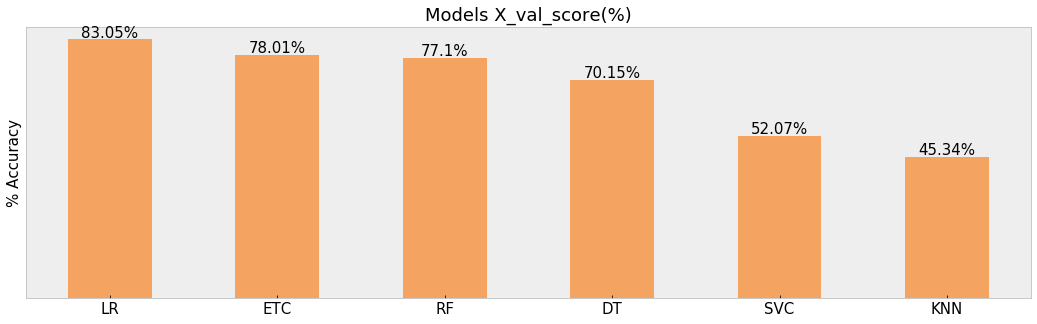

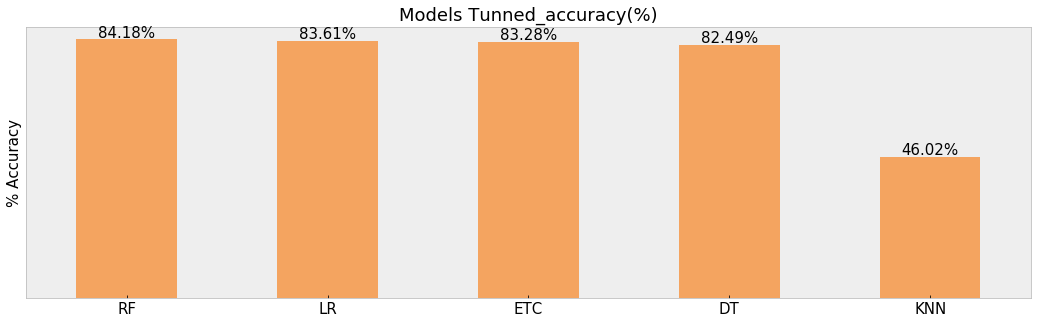

In [106]:
'''#4.Create a function that compares cross validation scores with tunned scores for different models by plotting them.'''
def compare_scores(accuracy):
    global ax1   
    font_size = 15
    title_size = 18
    ax1 = accuracy.plot.bar(legend = False,  title = 'Models %s' % ''.join(list(accuracy.columns)), figsize = (18, 5), color = 'sandybrown')
    ax1.title.set_size(fontsize = title_size)
    # Removes square brackets and quotes from column name after to converting list.
    pct_bar_labels()
    plt.ylabel('% Accuracy', fontsize = font_size)
    plt.show()

'''Compare cross validation scores with tunned scores to find the best model.'''
bold('**Comparing Cross Validation Scores with Optimized Scores:**')
compare_scores(sorted_x_val_score)
compare_scores(sorted_tunned_scores)

In [107]:
'''Instantiate the models with optimized hyperparameters.'''
rf  = RandomForestClassifier(**rf_best_params)
# svc = SVC(**svc_best_params)
knn = KNeighborsClassifier(**knn_best_params)
etc = ExtraTreesClassifier(**etc_best_params)
lr  = LogisticRegression(**lr_best_params)
dt  = DecisionTreeClassifier(**dt_best_params)

'''Train all the models with optimised hyperparameters.'''
models = {'RF':rf,'SVC':svc, 'KNN':knn, 'ETC':etc, 'LR':lr, 'DT':dt}
bold('**10-fold Cross Validation after Optimization:**')
score = []
for x, (keys, items) in enumerate(models.items()):
    # Train the models with optimized parameters using cross validation.
    # No need to fit the data. cross_val_score does that for us.
    # But we need to fit train data for prediction in the follow session.
    from sklearn.model_selection import cross_val_score
    items.fit(X_train, y_train)
    scores = cross_val_score(items, X_train, y_train, cv = 10, scoring = 'accuracy')*100
    score.append(scores.mean())
    print('Mean Accuracy: %0.4f (+/- %0.4f) [%s]'  % (scores.mean(), scores.std(), keys))

**10-fold Cross Validation after Optimization:**

Mean Accuracy: 84.1782 (+/- 4.3558) [RF]
Mean Accuracy: 52.0702 (+/- 8.9592) [SVC]
Mean Accuracy: 46.0190 (+/- 8.2222) [KNN]
Mean Accuracy: 83.2781 (+/- 4.3940) [ETC]
Mean Accuracy: 83.5040 (+/- 3.6112) [LR]
Mean Accuracy: 82.5040 (+/- 4.1476) [DT]


In [108]:
'''Make prediction using all the trained models.'''
model_prediction = pd.DataFrame({'RF':rf.predict(X_test), 
                                 'DT':dt.predict(X_test), 'SVC':svc.predict(X_test), 
                                 'KNN':knn.predict(X_test), 'LR':lr.predict(X_test)})

"""Let's see how each model classifies a prticular class."""
bold('**All the Models Prediction:**')
display(model_prediction.head())

**All the Models Prediction:**

,RF,DT,SVC,KNN,LR
0,0,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1


Findings: We can see some negative values that means that higher value of the corresponding feature pushes the classification more towards the negative class (in our case 0) that is, of course, something we're already aware of. Some features like Family_size_single, Embarked_Q, Embarked_C, and Cabin_F were given zero importance by lr.

**Confusion Matrix**

The confusion matrix shows the number of correct classifications along with misclassifications when a classifier make predictions for each class (positive or negative). The diagonal elements are correct classification while the off diagonal elements are misscalssifications. Some basic terms associated with confusion matrix:

True positives (TP): These are cases in which we predicted 1(yes), and the actual is also 1(yes).
True negatives (TN): We predicted 0(no), and the actual is also 0(no).
False positives (FP): We predicted 1(yes), but the actual is 0(no). (Also known as a "Type I error.")
False negatives (FN): We predicted 0(no), but the actual is 1(yes). (Also known as a "Type II error.")

In [109]:
'''Return prediction to use it in another function.'''
def x_val_predict(model):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, X_train, y_train, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.

'''Function to return confusion matrix.'''
def confusion_matrix(model):
    predicted = x_val_predict(model)
    confusion_matrix = pd.crosstab(y_train, predicted, rownames = ['Actual'], colnames = ['Predicted/Classified'], margins = True) # We use pandas crosstab
    return display(confusion_matrix)

'''Now calculate confusion matrix of rf and gbc.'''
bold('**RF Confusion Matrix:**')
confusion_matrix(rf)

**RF Confusion Matrix:**

Predicted/Classified,0,1,All
Actual,,,
0,506,43,549
1,98,244,342
All,604,287,891


In [110]:
'''Initialize bagging classifier.'''
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator = rf, verbose = 0, n_jobs = -1, random_state = seed)
'''We use rf as the base estimator for bagging technique.'''
print('Fitting Bagging Ensemble...')
display(bagg.fit(X_train, y_train))
print('Done.')

'''Bagging cross validation score.'''
print('\nComputing Bagging X Val Score..')
bagg_x_val_score = cross_val_score(bagg, X_train, y_train, cv = 10, scoring = 'accuracy')
bagg_x_val_score = np.round(bagg_x_val_score.mean()*100, 2)
print('Done.')

'''Compare bagging ensemble score with best base models scores.'''
bagg_vs_base_score = pd.DataFrame({'Bagging_vs_base_score(%)': [bagg_x_val_score, rf_best_score, dt_best_score, knn_best_score, lr_best_score]})
'''So basically we're comparing bagging x_val_score with base models's tunned score.'''
bagg_vs_base_score.index = ['Bagg', 'RF','DT', 'KNN', 'LR']
bold('**Bagging vs Base Models Scores:**')
display(bagg_vs_base_score)

Fitting Bagging Ensemble...


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=44, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
         random_state=43, verbose=0, warm_start=False)

Done.

Computing Bagging X Val Score..
Done.


**Bagging vs Base Models Scores:**

,Bagging_vs_base_score(%)
Bagg,83.05
RF,84.18
DT,82.49
KNN,46.02
LR,83.61


In [111]:
def x_val_predict(model):
    from sklearn.model_selection import cross_val_predict
    predicted = cross_val_predict(model, X_train, y_train, cv = 10)
    return predicted # Now we can use it in another function by assigning the function to its return value.


In [112]:
df_test  = merged.iloc[418:, :]
y_pred=pd.DataFrame(x_val_predict(rf))

In [118]:
y_pred.shape

(891, 1)

In [114]:
ranfor = model_prediction


submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": x_val_predict(rf) })

In [115]:

titanic = submission.iloc[:418, :]
titanic = titanic.to_csv('titanic.csv',sep=',', index=False)
titanic = pd.read_csv('titanic.csv')
titanic.shape

(418, 2)

In [116]:
titanic.columns

Index(['PassengerId', 'Survived'], dtype='object')

---

# Conclusion
### In analysing the Titanic passenger’s data, we have used a number of predictive analytical methodologies, (Random Forest) that computed 6 models with trees in a few seconds to come up with different predictive models.